In [3]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd

<IPython.core.display.Javascript object>


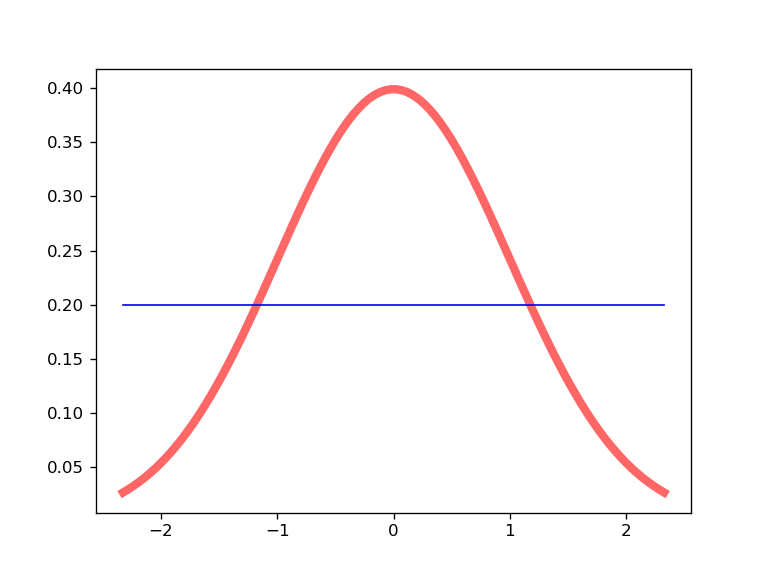

In [4]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2), 'b-', lw=1)

fig.show()

In [5]:
data = pd.read_csv("./data/TCL_wt1.tsv", sep='\t')
data

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
3,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,tufB,#VALEUR!,#VALEUR!,NaN,#VALEUR!
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669
...,...,...,...,...,...,...,...
2019,P24240,6-phospho-beta-glucosidase AscB OS=Escherichia...,ascB,#VALEUR!,#VALEUR!,NaN,#VALEUR!
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.65968582,0.002226,2.652390664
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390435,0.000068,4.16495627
2022,P0AB40,Multiple stress resistance protein BhsA OS=Esc...,bhsA,1.798039216,0.846424487,0.035928,1.444561032


In [6]:
df = data.dropna()
df

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183007,-3.009460329,0.036746,1.434786589
...,...,...,...,...,...,...,...
2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535947712,0.619129104,0.310725,0.507623276
2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552287582,0.634395861,0.013373,1.873756665
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.65968582,0.002226,2.652390664
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390435,0.000068,4.16495627


In [9]:
abundance = df['Log2 Corrected Abundance Ratio'].tolist()
abundance = [float(x) for x in abundance]
mean = np.mean(abundance)
S_2 = (len(abundance)/(len(abundance)-1))*pow(np.std(abundance), 2)
print(mean)
print(S_2)

-0.63862621564433
0.22161436206330615


On va corriger l'écart type : (n/(n-1))^variance

On récupère l'aire de l'histogramme pour créer une courbe de loi normale à bonne échelle : l'aire de la zone bleue et celle sous la courbe seront les mêmes.

<IPython.core.display.Javascript object>


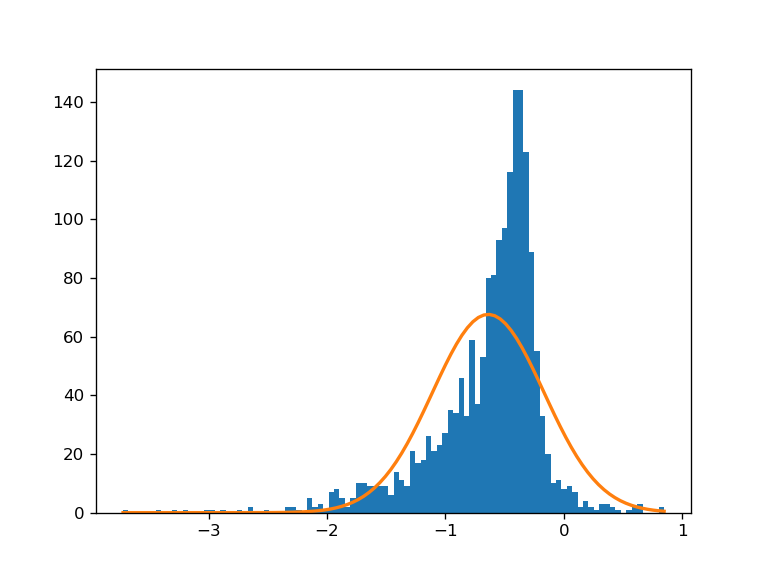

In [53]:
fig, ax = plt.subplots()
hist = ax.hist(abundance, bins=100)
x = np.linspace(min(abundance), max(abundance), 100)
dx = hist[1][1] - hist[1][0]
scale = len(abundance)*dx
ax.plot(x, norm.pdf(x, mean, np.sqrt(S_2))*scale, lw = 2)
fig.show()

Ratio d'abondance : nombre de protéine dans condition expérimentale sur celui dans la condition de contrôle. Le milieu riche est la condition de contrôle. La tétracycline interrompt la traduction, c'est donc normal d'avoir moins de protéines dans la condition avec tétracycline.

### Représenter le volcano plot avec scatter, soit la formule suivante:

 <img src="https://render.githubusercontent.com/render/math?math=-\text{Log}_{10}({\text{p-value}}) = f(\text{Log}_2(\text{abundance ratio}))">

In [11]:
list(df.columns.values)

['Accession',
 'Description',
 'Gene Symbol',
 'Corrected Abundance ratio (1.53)',
 'Log2 Corrected Abundance Ratio',
 'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)',
 '-LOG10 Adj.P-val']

<IPython.core.display.Javascript object>


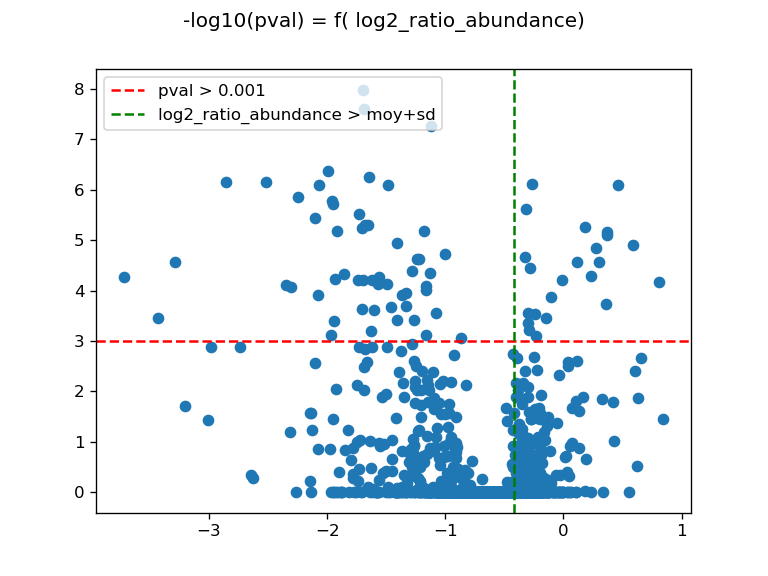

In [18]:
df_logratio = df['Log2 Corrected Abundance Ratio'].astype(float)
fig, ax = plt.subplots()
ax.scatter(x = df_logratio, y = df['-LOG10 Adj.P-val'].astype(float))
fig.suptitle('-log10(pval) = f( log2_ratio_abundance)')
l1 = plt.axhline(-np.log10(0.001), color = 'red', ls = '--')
l1.set_label('pval > 0.001')
l2 = plt.axvline(mean+S_2, color='green', ls = '--')
l2.set_label('log2_ratio_abundance > moy+sd')
plt.legend()
fig.show()

In [19]:
#return all GO from a protlist as a set:
#proteins is the xml element build with the teacher code
#protlist is the list of overabundant protein accession numbers
def GO_Sets(proteins, protlist):
    mylist = []
    for entry in proteins:
        accessions = entry.findall(ns+"accession")
        for acc in accessions:
            if acc.text in expresp:
                #dump(entry)
                a = entry.iter()
                for el in a:
                    it = el.items()
                    if len(it) == 2:
                        if it[0][1] == "GO":
                            mylist.append(it[1][1])
    myset = set(mylist)
    return myset